# Histograms

_Rev12 Feb. 18, 2021, JB, Physics SFU_

Histograms enable you to visualize the distribution and dispersion of statistical data. They provide an estimate of the probabilitty distribution of your data.

Before plotting a histogram, your dataset is first split or grouped into defined intervals commonly known as bins. Each bin contains the number of occurrences of the data in the dataset that are contained within that interval. The results are then plotted as vertical (or horizontal) bars on a chart with the height (or width when horizontal) of the bar representing the frequency (i.e. number) of data values falling within that bin. Histograms are often normalized so that the integral over the range is 1.

This version uses test data that is loaded from an external file, 'histsample_m10_s2.txt'.

## Load required libraries

In [1]:
# For scientific computing
import numpy as np
from numpy import pi,exp,sqrt                 # to make code more readable :)

# For plotting
import matplotlib.pyplot as plt

## Load data and check that is what you expect
Load data file 'histsample_m10_s2.txt'. This data was generated with numpy.random.randn using a mean μ=10 and standard devation σ=2.

In [2]:
Data = np.loadtxt('histsample_m10_s2.txt', delimiter='\t')
x=Data[0]
data=Data[1]

In [3]:
# now check that it worked
mean = np.mean(data)
stdev = np.std(data)
print(f'mean: {mean:.1f}, standard deviation: {stdev:.1f}')

mean: 9.9, standard deviation: 2.0


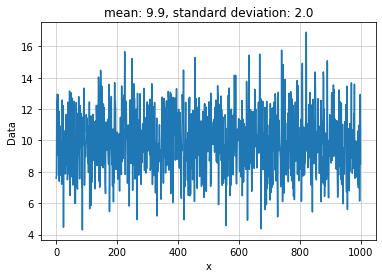

In [4]:
# and plot the data to have a look
plt.plot(x,data)
plt.title(f'mean: {mean:.1f}, standard deviation: {stdev:.1f}')
plt.xlabel('x')
plt.ylabel('Data')
plt.grid(which='major', axis='both',linewidth = 0.5)
plt.show()

## Plot the histogram
Now display the data in a histogram. Start with 25 bins. (You should explore the effect of changing the number of bins used in generating the histogram.)

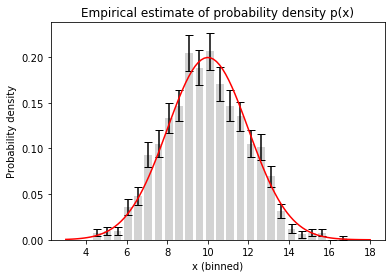

In [5]:
nbins = 25 # number of bins for the histogram

# create array
counts, bins = np.histogram(data, bins=nbins)    # counts has the number of counts in each bin
# density = True produces a normalized array
pdf, bins = np.histogram(data, bins=nbins, density=True)  # pdf = counts / Z is normalized so sum pdf_i * bins_i = 1
dbins = np.diff(bins) 
Z = np.sum(counts*dbins)

# calculate the error bars
# the error in counts is the square root of the value  (hist. approx. a Poisson process, assumes independendent data)
# since the data is normalized, we need to take the normalization factor into account
# the normalization factor is the area - the total number of counts multiplied by the width of each bin
counts_err = sqrt(counts) / Z 
counts_err0 = sqrt(counts/Z) / sqrt(x.shape * np.diff(bins))    # this is the same, as you can check

# plot the output as a histogram
# np.histogram outputs the counts in each bin and the bin edges
# we need to find the centre value of the bin for the placement of the error bars
# we use the difference between bin edges for the width of the bins - multiply by 0.75 so that there is space between the bins

bcenter = (bins[:-1] + bins[1:]) / 2
plt.bar(bcenter, pdf, yerr=counts_err, align='center', width=dbins*0.75, capsize=4,color=['lightgray'])
# if you used the variable names 'pdf' and 'bins' in the previous steps, then the plot will run correctly.

xpdf = np.linspace(3,18,100)
μ=10                                            # one could also use the empirical mean, stdev
σ=2
dx = (xpdf - μ)/σ                               # normalized deviations
pdftheory = 1/(sqrt(2*pi)*σ)*exp(-dx*dx/2)      # Gaussian pdf (theory)
plt.plot(xpdf,pdftheory,'r-')

# now label your graph
plt.title('Empirical estimate of probability density p(x)')
plt.xlabel('x (binned)')
plt.ylabel('Probability density')
plt.show()

Alternatively, use matplotlib.pyplot.hist() with matplotlib.pyplot.errorbar(), instead of using matplotlib.pyplot.bar(). matplotlib.pyplot.hist() both bins the data and plots it. Adding the errorbars using matplotlib.pyplot.errorbar() provides a more universal way to plot error bars.

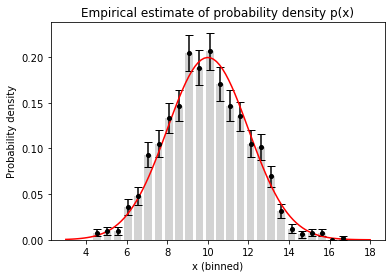

In [6]:
nbins = 25       # number of bins for the histogram

# create array and plot the output as a histogram
# density = True produces a normalized array
pdf, bins, patches = plt.hist(data, bins=nbins, density=True, rwidth=0.75,color=['lightgray'])

# now add the error bars
# the error in counts is the square root of the value
# since the data is normalized, we need to take the normalization factor into account
# the normalization factor is the area - the total number of counts multiplied by the width of each bin
counts_err = sqrt(pdf) / sqrt(x.shape * np.diff(bins)) 

# plt.hist outputs the counts in each bin and the bin edges
# we find the centre value of the bin for the placement of the error bars

bcenter = (bins[:-1] + bins[1:]) / 2
plt.errorbar(bcenter, pdf, yerr=counts_err, fmt='ko', markersize=4, capsize=4)
# If you used the variable name 'pdf' and 'bins' in the previous step then the plot will run correctly.

plt.plot(xpdf,pdftheory,'r-')

# Now label your graph
plt.title('Empirical estimate of probability density p(x)')
plt.xlabel('x (binned)')
plt.ylabel('Probability density')
plt.show()